# BREATHING WAVE
## DEEP LEARNING - LSTM
### 04 March 2023

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv("breathing_waveform_data.csv").iloc[:, :-1] # get rid of last column ("notes")

In [2]:
df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,labels
0,0.483309,0.459790,0.431024,0.376565,0.295734,0.193290,0.066060,-0.083445,-0.247221,-0.409374,...,0.391514,0.452677,0.521407,0.595845,0.661691,0.702932,0.708613,0.682564,0.637765,deep
1,-2.044518,-1.935588,-1.808629,-1.667919,-1.513497,-1.348760,-1.171044,-0.972509,-0.759554,-0.547793,...,0.138731,-0.053860,-0.241691,-0.417603,-0.582320,-0.738485,-0.889731,-1.037066,-1.174654,deep
2,-1.213535,-1.269056,-1.323306,-1.375251,-1.430062,-1.485479,-1.529200,-1.557172,-1.574662,-1.575457,...,0.947940,0.996154,1.035743,1.049543,1.024204,0.954716,0.844505,0.702445,0.541555,deep
3,-0.914806,-0.887726,-0.856065,-0.823527,-0.794551,-0.768074,-0.740895,-0.713364,-0.685445,-0.652020,...,-0.478218,-0.571465,-0.684115,-0.817078,-0.966231,-1.122537,-1.264759,-1.376908,-1.461059,deep
4,-1.547469,-1.458818,-1.362120,-1.264829,-1.164948,-1.060064,-0.954496,-0.849448,-0.742812,-0.636614,...,0.227050,0.130983,0.041438,-0.038034,-0.106152,-0.163048,-0.210926,-0.253102,-0.290270,deep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,-0.152463,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,...,-0.336787,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,quick
26396,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,...,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,quick
26397,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,...,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209,quick
26398,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,0.294399,...,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209,0.264014,quick


In [3]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

# Check if the data do not have any NULL 
print("X have a null? \t{}".format(X.isnull().values.any()))
print("Y have a null? \t{}".format(Y.isnull().values.any()))

X have a null? 	False
Y have a null? 	False


In [4]:
X

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,0.483309,0.459790,0.431024,0.376565,0.295734,0.193290,0.066060,-0.083445,-0.247221,-0.409374,...,0.332737,0.391514,0.452677,0.521407,0.595845,0.661691,0.702932,0.708613,0.682564,0.637765
1,-2.044518,-1.935588,-1.808629,-1.667919,-1.513497,-1.348760,-1.171044,-0.972509,-0.759554,-0.547793,...,0.325687,0.138731,-0.053860,-0.241691,-0.417603,-0.582320,-0.738485,-0.889731,-1.037066,-1.174654
2,-1.213535,-1.269056,-1.323306,-1.375251,-1.430062,-1.485479,-1.529200,-1.557172,-1.574662,-1.575457,...,0.902226,0.947940,0.996154,1.035743,1.049543,1.024204,0.954716,0.844505,0.702445,0.541555
3,-0.914806,-0.887726,-0.856065,-0.823527,-0.794551,-0.768074,-0.740895,-0.713364,-0.685445,-0.652020,...,-0.407344,-0.478218,-0.571465,-0.684115,-0.817078,-0.966231,-1.122537,-1.264759,-1.376908,-1.461059
4,-1.547469,-1.458818,-1.362120,-1.264829,-1.164948,-1.060064,-0.954496,-0.849448,-0.742812,-0.636614,...,0.322969,0.227050,0.130983,0.041438,-0.038034,-0.106152,-0.163048,-0.210926,-0.253102,-0.290270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,-0.152463,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,...,-0.345803,-0.336787,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372
26396,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,...,-0.336787,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958
26397,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,...,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209
26398,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,0.294399,...,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209,0.264014


In [5]:
Y.value_counts()

normal        19734
quick          2667
hold           2133
deep           1066
deep_quick      800
Name: labels, dtype: int64

### Program Starting
# PART 1 : Data Preprocessing

## Hot Encoded The Label Data 

In [6]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode class values as integers [0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
hot_y = np_utils.to_categorical(encoded_Y)

In [7]:
hot_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

## Extract using MFCC (if you not want, just skip this)

In [ ]:
import librosa
from tqdm import tqdm

def extract_mfcc(df_, sr=60, n_mfcc=85):
  df_mfcc = []
  with tqdm(total=df_.shape[0]) as pbar: 
      for i,row in df_.iterrows():
        pbar.update(1)
        y = np.array(row).astype(np.float32)
        #print("y : {}".format(y))
        #print("y shape: {}".format(np.array(y).shape))
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        #print("mfccs before squeze : {}".format(mfccs))
        #print("mfccs before squeze : {}".format(np.array(mfccs).shape))
        
        mfccs = np.squeeze(mfccs, axis=1)
        #print("mfccs after squeze: {}".format(mfccs))
        #print("mfccs after squeze : {}".format(np.array(mfccs).shape))
        
        df_mfcc.append([*mfccs])
        #print("df_mfcc : {}".format(df_mfcc))
        #print("df_mfcc shape : {}".format(np.array(df_mfcc).shape))
      df_mfcc = pd.DataFrame(df_mfcc, columns=[*np.arange(0,85)])
  return df_mfcc

In [ ]:
X = extract_mfcc(X)

## Scale The Training Data (STD)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Reshaping The Training Data to 3-Dimensional Numpy Array
### STRUCTURE : (batch_size, timestep, feature)

In [10]:
timestep = 5
X = np.reshape(X, (X.shape[0], int(85/timestep), timestep))
# (26400, 17, 5)
# 5 indicator will be used per sequence/timestep per sample/row

## Train Test Split (80% training 20% Testing)
### REMEMBER : seed must same (random_state = 21)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, hot_y, test_size=.2, random_state=21)

# PART 2 : Building The RNN

In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

## Creating Layer of RNN

In [13]:
# Configuration for Model Structure
from keras.optimizers import Adam
_optimizer = Adam()
_loss = "categorical_crossentropy"
_metric = ["accuracy"]

In [14]:
classifier = Sequential()

# first layer
classifier.add(LSTM(units=60, return_sequences=True, input_shape=(17, 5)))
classifier.add(Dropout(0.2))    # Ignore 20% of the neuron (ex. 50 * 20% = 10 neuoron will be ignored) 

# second layer
classifier.add(LSTM(units=60, return_sequences=True))
classifier.add(Dropout(0.2))

# third layer
# classifier.add(LSTM(units=20, return_sequences=True))
# classifier.add(Dropout(0.2))

# fourth layer
classifier.add(LSTM(units=60))
classifier.add(Dropout(0.2))

# last layer
classifier.add(Dense(units=5, activation='softmax'))

# Compile
classifier.compile(optimizer=_optimizer, loss=_loss, metrics=_metric)

# Plot Summary of Model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 17, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 17, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 17, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 17, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60)                29040     
                                                                 
 dropout_2 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 5)                 3

# PART 3 : Training Time

## Train the Model

In [15]:
# Setting for training arguments (epoch, batch_size)
ep = 15        # epoch
bt = 32        # batch_size
# Without Cross-Validation
classifier.fit(X_train, Y_train, epochs=ep, batch_size=bt, validation_data=(X_test, Y_test))

Epoch 1/15
660/660 [==============================] - 16s 19ms/step - loss: 0.7114 - accuracy: 0.7672 - val_loss: 0.6455 - val_accuracy: 0.7680
Epoch 2/15
660/660 [==============================] - 13s 19ms/step - loss: 0.5988 - accuracy: 0.7793 - val_loss: 0.5158 - val_accuracy: 0.8085
Epoch 3/15
660/660 [==============================] - 12s 18ms/step - loss: 0.4897 - accuracy: 0.8097 - val_loss: 0.4167 - val_accuracy: 0.8458
Epoch 4/15
660/660 [==============================] - 12s 19ms/step - loss: 0.3744 - accuracy: 0.8607 - val_loss: 0.3184 - val_accuracy: 0.8922
Epoch 5/15
660/660 [==============================] - 12s 19ms/step - loss: 0.2801 - accuracy: 0.9029 - val_loss: 0.2587 - val_accuracy: 0.9144
Epoch 6/15
660/660 [==============================] - 12s 19ms/step - loss: 0.2103 - accuracy: 0.9297 - val_loss: 0.1634 - val_accuracy: 0.9491
Epoch 7/15
660/660 [==============================] - 12s 18ms/step - loss: 0.1630 - accuracy: 0.9461 - val_loss: 0.1379 - val_accuracy:

## Evaluate Model

In [16]:
# evaluate the model
score = classifier.evaluate(X_test, Y_test)
print("Accuracy \t: {:.2f}".format(score[1]*100))
print("Loss \t\t: {:.2f}".format(score[0]*100))

165/165 [==============================] - 1s 8ms/step - loss: 0.0754 - accuracy: 0.9761
Accuracy 	: 97.61
Loss 		: 7.54


In [17]:
pred = classifier.predict(X_test)

165/165 [==============================] - 2s 8ms/step


In [18]:
y_true = np.argmax(Y_test, axis=1)
y_pred = np.argmax(pred, axis=1)

## Plot Confusion Matrix

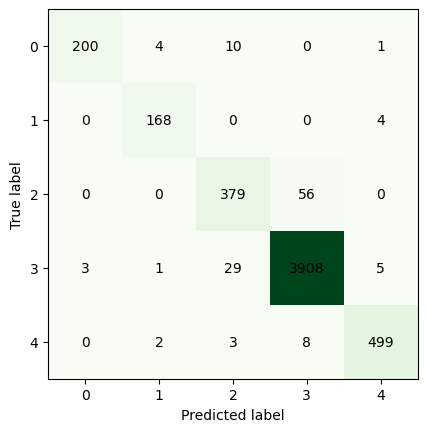

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Define the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

# Add labels to the plot
tick_marks = np.arange(len(conf_matrix))
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add values to the plot
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center')

# Show the plot
plt.show()

## Saving the model into a file

In [ ]:
import os

# saving the model
filename = "{}\\{}\\{}.h5".format(os.getcwd(), "MODELS\\[3-layer] - 3L1", _optimizer)
classifier.save(filename)

# PART 4 : Testing the Loaded Model

In [ ]:
from tensorflow.keras.models import load_model

# _optimizer = "Adam"
filename = "{}\\{}\\{}.h5".format(os.getcwd(), "MODELS\\[3-layer] - 3L1", _optimizer)

# load model
loaded_model = load_model(filename)

## evaluate the model

In [ ]:
score = loaded_model.evaluate(X_test, Y_test)
print("Accuracy \t: {:.2f}".format(score[1]*100))
print("Loss \t\t: {:.2f}".format(score[0]*100))